In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import MultipleLocator
import statsmodels.api as sm
from patsy import dmatrices
from scipy import stats
warnings.filterwarnings("ignore")

% matplotlib inline

C:\Users\chong\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
"""
Step One: Load our imports and data
"""

min_date = pd.to_datetime("01/01/1994")
max_date = pd.to_datetime("12/31/2015")

#: EventVestor data
ev_data = pd.read_csv('HFA.csv',index_col=0)

#: Converting our Dates into a Series of Datetimes so we can do some date logic easily
ev_data['date'] = pd.to_datetime(ev_data['date'])
ev_data = ev_data[(ev_data['date'] > min_date)]
ev_data = ev_data[(ev_data['date'] < max_date)]

In [3]:
ev_data['EventDate']=pd.to_datetime(ev_data['EventDate'].astype(int).astype(str),errors='coerce')

In [4]:
# permno = ev_data['Permno'][ev_data['Permno']>0].astype(int).drop_duplicates()
# permno.to_csv('HFA_permno.txt',index=False)

In [5]:
# (ev_data['EventDate'].apply(lambda x:x.weekday())>4).sum()

In [6]:
CRSP = pd.read_csv('CRSP.csv',na_values=['','C','B'])

In [7]:
for col in ['VOL','RET','SHROUT','vwretd','ewretd']:
    flag = pd.notnull(CRSP[col])
    CRSP.loc[CRSP.index[flag],col] = \
    stats.mstats.winsorize(CRSP[flag][col],limits=(0.01,0.01))

In [8]:
CRSP['date'] = pd.to_datetime(CRSP['date'].astype(str))

In [9]:
CRSP['RET+1'] = CRSP['RET'] + 1
CRSP['vwretd+1'] = CRSP['vwretd'] + 1
CRSP['ewretd+1'] = CRSP['ewretd'] + 1
CRSP['tor'] = CRSP['VOL'] / CRSP['SHROUT'] / 1000

In [10]:
# car = pd.DataFrame(np.zeros([41,4276]),columns=list(range(4276)),index=list(range(-20,21)))

In [11]:
# for i in range(4276):
#     ev_date = ev_data.iloc[i,6]
#     if ev_date.weekday() == 5:
#         ev_date = ev_date + pd.Timedelta(days=2)
#     if ev_date.weekday() == 6:
#         ev_date = ev_date + pd.Timedelta(days=1)
#     per = ev_data.iloc[i,3]
#     df = CRSP[CRSP['PERMNO']==per].sort_values(by='date')
#     index = df['date'][df.date==ev_date].index
#     if len(index) > 0:
#         index = index[0]
#         window = df.loc[index-20:index+20,:]
#         if len(window) == 41:
#             window['cret'] = window['RET+1'].cumprod()
#             window['cvwretd'] = window['vwretd+1'].cumprod()
#             car.loc[:,i] = list(window['cret'] - window['cvwretd'])

In [12]:
# car = car.transpose()
# car.to_csv('car.csv',encoding='utf-8',index=False)

In [13]:
car = pd.read_csv('car.csv',encoding='utf-8')
car1 = car.copy()
car2 = car1[(car1 != 0).sum(axis=1).astype(bool)]
acar = car2.mean()

In [14]:
# cat = pd.DataFrame(np.zeros([42,4276]),columns=list(range(4276)),index=list(range(-20,22)))

In [15]:
# for i in range(4276):
#     ev_date = ev_data.iloc[i,6]
#     if ev_date.weekday() == 5:
#         ev_date = ev_date + pd.Timedelta(days=2)
#     if ev_date.weekday() == 6:
#         ev_date = ev_date + pd.Timedelta(days=1)
#     per = ev_data.iloc[i,3]
#     df = CRSP[CRSP['PERMNO']==per].sort_values(by='date')
#     index = df['date'][df.date==ev_date].index
#     if len(index) > 0:
#         index = index[0]
#         window = df.loc[index-100:index+21,:]
#         if len(window) == 122:
#             norm = window.iloc[0:61,-1].mean()
#             cat.loc[:,i] = list((window.iloc[-42:,-1] - norm) / norm)

In [16]:
# cat = cat.transpose()
# cat.to_csv('cat.csv',encoding='utf-8',index=False)

In [17]:
cat = pd.read_csv('cat.csv',encoding='utf-8')
cat1 = cat.copy()
cat2 = cat1[(cat1 != 0).sum(axis=1).astype(bool)]
acat = cat2.mean()

In [18]:
cat[pd.notnull(cat.iloc[:,0]) & (cat.iloc[:,0] != 0)].shape

(3538, 42)

In [19]:
sns.set(style='darkgrid')

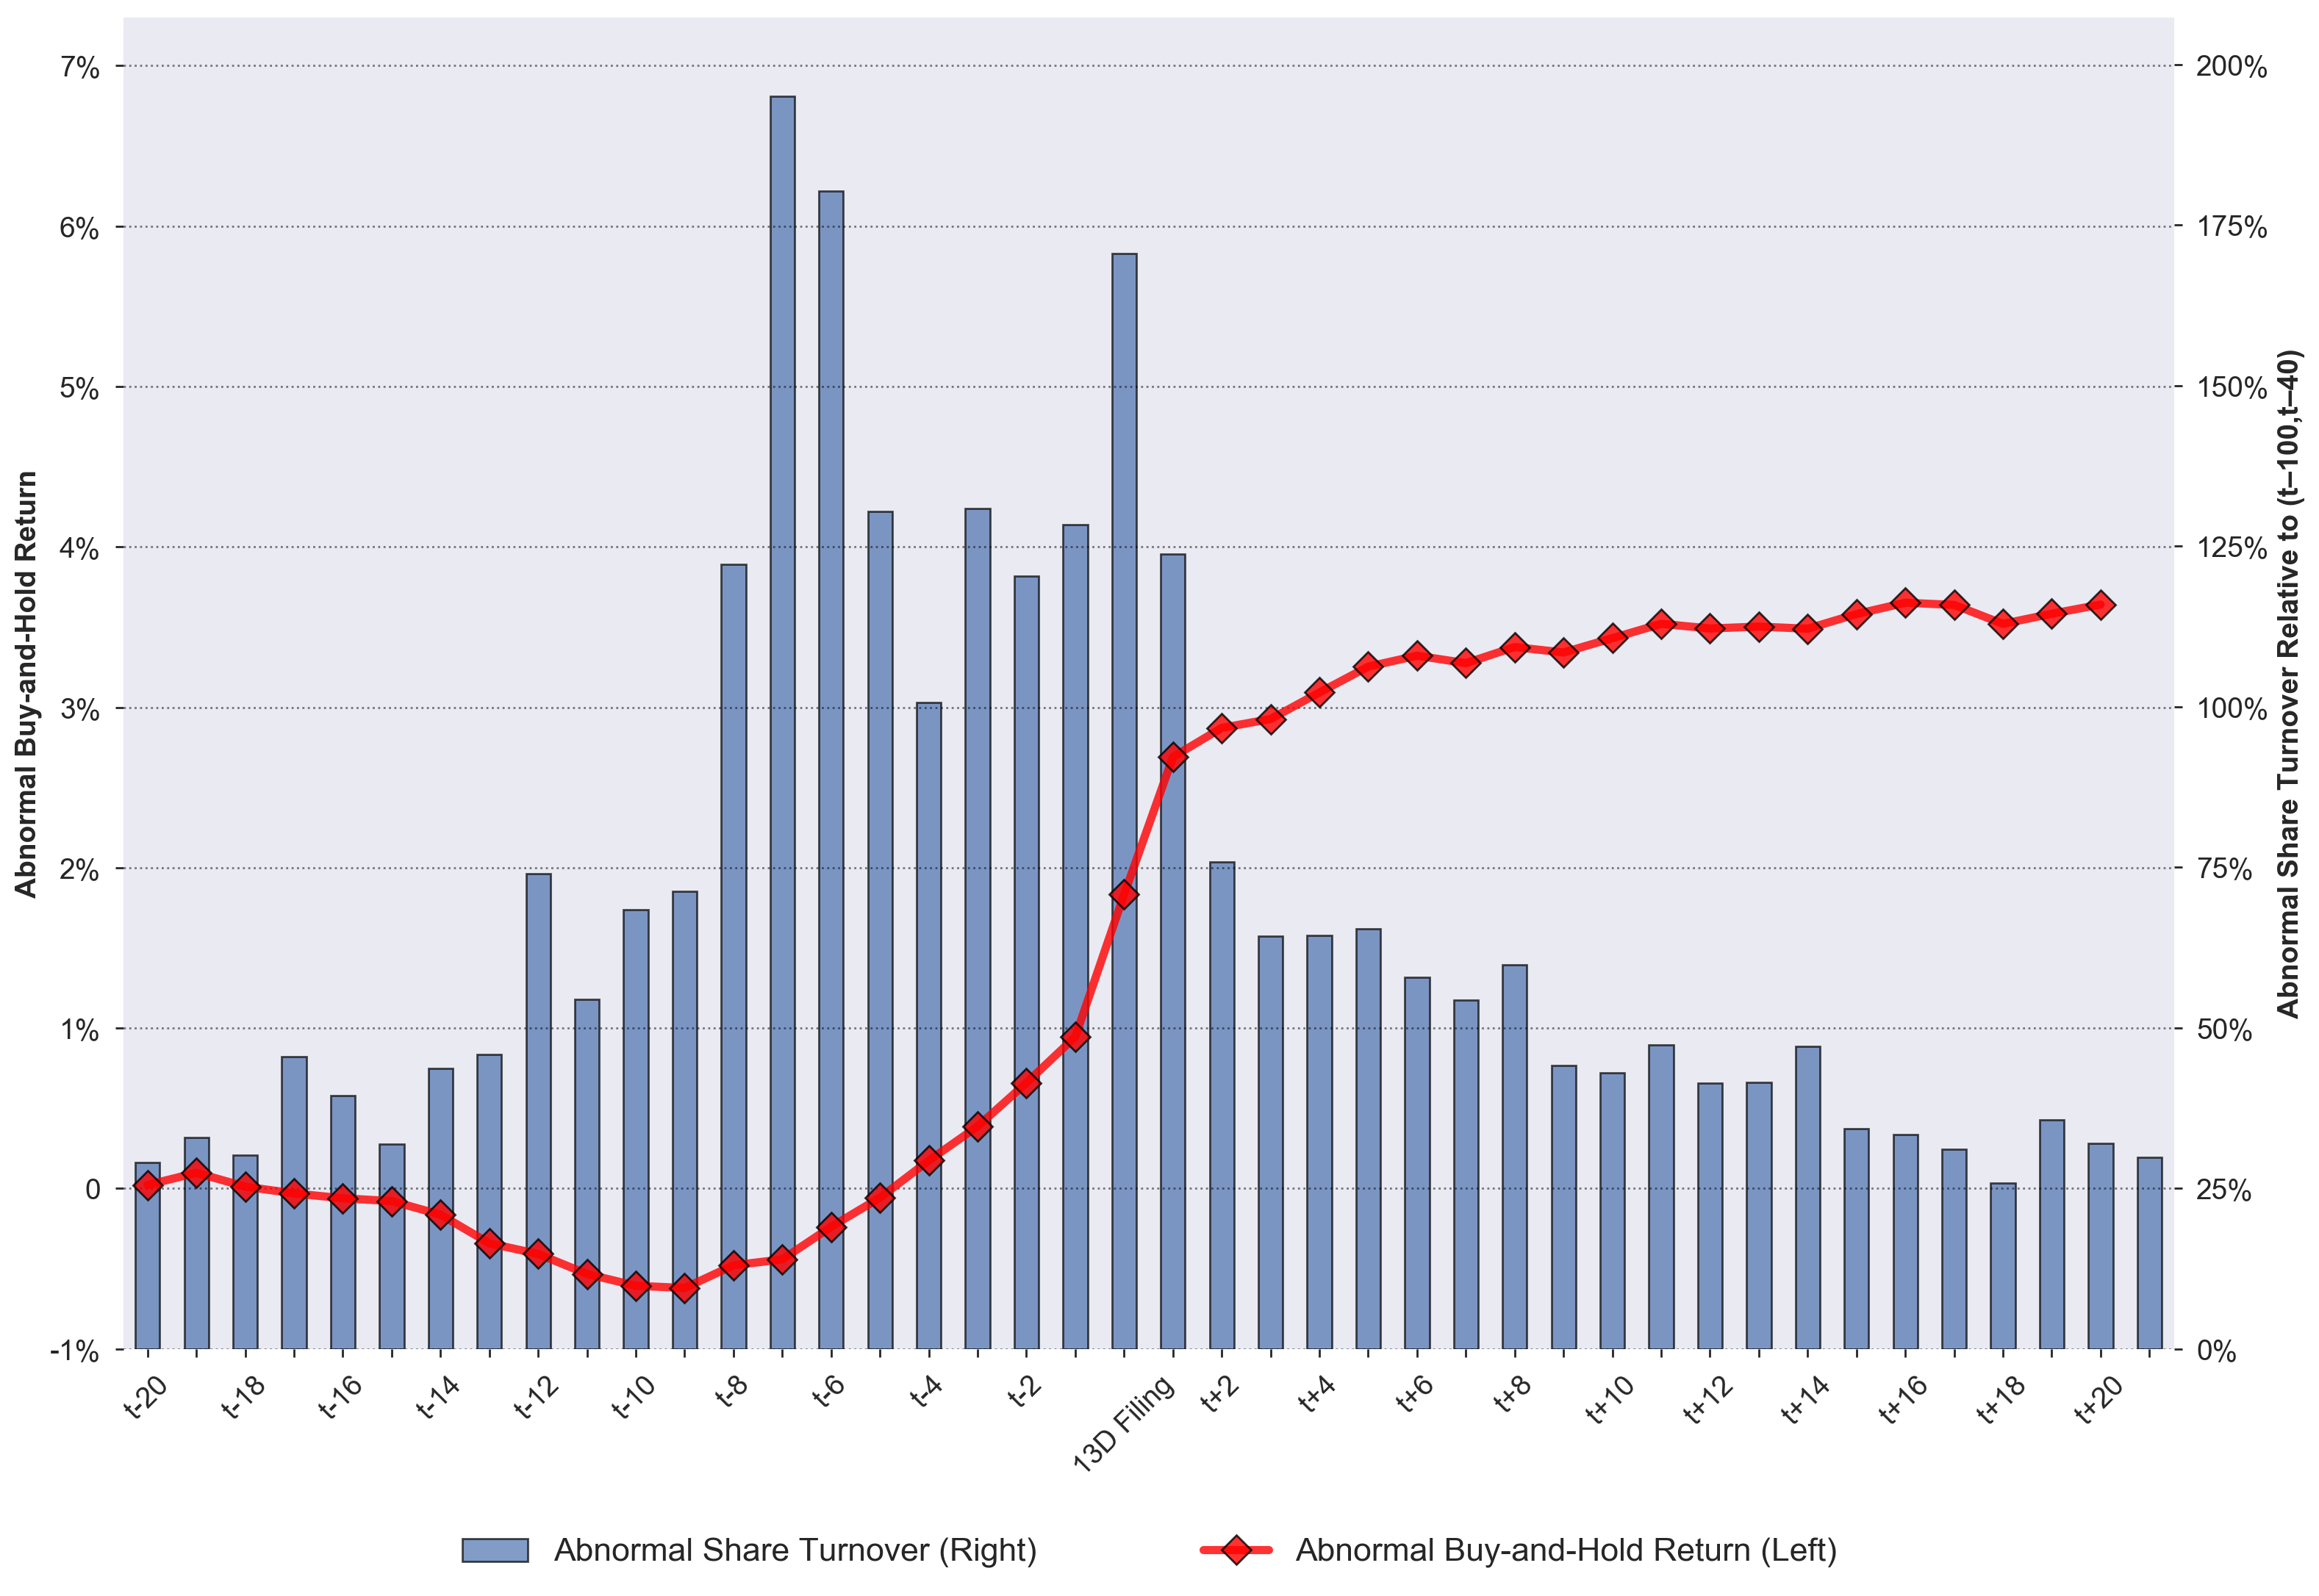

In [21]:
fig1 = plt.figure(figsize = (18,12),dpi=200)
ax1 = fig1.add_subplot(111)

ax1.bar(np.arange(-20,22),acat,width=0.5,label='Abnormal Share Turnover (Right)',edgecolor='black',\
       linewidth=1,alpha=0.7)
ax1.set_xticks(np.arange(-20,22))
ax1.set_xlim(-20.5,21.5)
ax1.set_xticklabels(['t-20','','t-18','','t-16','','t-14','','t-12','','t-10','','t-8','',\
                    't-6','','t-4','','t-2','','13D Filing','','t+2','','t+4','','t+6','','t+8',\
                    '','t+10','','t+12','','t+14','','t+16','','t+18','','t+20'],fontsize=14,\
                   rotation=45)
ax1.tick_params(axis='both',direction='out',length=4,which='both')
ax1.set_ylim(0,2.073)
ax1.set_yticks(np.arange(0,2.25,0.25))
ax1.set_yticklabels(['%d%%' % i for i in range(0,225,25)],fontsize=14)
ax1.set_ylabel('Abnormal Share Turnover Relative to (t–100,t–40)',size=14,weight='bold',\
              verticalalignment='bottom')
ax1.grid(False)

ax2 = ax1.twinx()
# ax.spines['bottom'].set_color('black')
# ax.spines['top'].set_color('black')
# ax.spines['left'].set_color('black')
# ax.spines['right'].set_color('black')
ax2.plot(acar,lw = 4,color='red',marker = 'D',markersize=10,markerfacecolor='red',\
         markeredgecolor='black',markeredgewidth=1,alpha=0.8,\
         label='Abnormal Buy-and-Hold Return (Left)')
ax2.set_xlim(-20.5,21.5)
ax2.set_yticks([-0.01,0,0.01,0.02,0.03,0.04,0.05,0.06,0.07])
ax2.set_yticklabels(['-1%','0','1%','2%','3%','4%','5%','6%','7%'],fontsize=14)
ax2.set_ylim(-0.01,0.073)
ax2.set_ylabel('Abnormal Buy-and-Hold Return',size=14,weight='bold',\
              verticalalignment='bottom')
ax2.grid(axis='y',ls='dotted',c='black',alpha=0.5)
ax2.tick_params(axis='y',direction='out',length=4,which='both')

ax1.yaxis.set_label_position('right')
ax1.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('left')
ax2.yaxis.set_ticks_position('left')

ax1.legend(bbox_to_anchor=(0.46, -0.12),fontsize=16)
ax2.legend(bbox_to_anchor=(0.85, -0.12),fontsize=16)

plt.savefig("es.jpg",dpi=400)

In [12]:
ev_data['tar'] = list(car.iloc[:,-1])
sample = ev_data[list((car1 != 0).sum(axis=1).astype(bool))]

In [13]:
com1 = pd.read_csv('Company.csv')

In [14]:
df1 = pd.pivot_table(com1,index="gvkey",values='rnd46',aggfunc=lambda x:pd.notnull(x).sum())
df2 = df1[df1.rnd46>0].index

In [15]:
df3 = com1[com1['gvkey'].isin(df2) | pd.isnull(com1['gvkey'])]

In [16]:
df3.rnd46 = df3.rnd46.fillna(value=0)
df3['analyst'] = df3['analyst'].fillna(value = 0)
df3['herfindahl'] = df3['herfindahl'].fillna(value = 1)
df3['inst'] = df3['inst'].fillna(value = 0)
df3['divyld'] = df3['divyld'].fillna(value = 0)

In [17]:
sample1 = pd.merge(sample,df3,left_on = ['Permno','year-1'],\
                 right_on = ['permno','yeara'])

In [18]:
cov = ['analyst','divyld','growth3yr','herfindahl','inst',\
 'levb','mv','q','rnd46','roa']
skewness = stats.skew(sample1[cov].dropna(),axis = 0)

In [19]:
cov_rs = [cov[i] for i in range(len(cov)) if skewness[i] > 0]
print(cov_rs)

['analyst', 'divyld', 'growth3yr', 'inst', 'levb', 'mv', 'q', 'rnd46']


In [20]:
sample1['lnmv'] = sample1['mv'].apply(np.log)
sample1[['analyst_log','rnd46_log']] = \
sample1[['analyst','rnd46']].apply(lambda x: np.log(1+x))

In [24]:
sample2 = sample1[(sample1.year<2016) & (sample1.year>1993)]
sample2.to_csv('sam.csv',encoding='utf-8',index=False)

In [42]:
y,X = dmatrices('tar ~ lnmv + q + levb + rnd46_log + roa + growth3yr\
+ divyld + inst + herfindahl + analyst_log',\
                data = sample1[sample1.year<2016],return_type = 'dataframe')
model = sm.OLS(y,X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tar   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.129
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           1.15e-05
Time:                        13:51:43   Log-Likelihood:                -749.02
No. Observations:                2014   AIC:                             1520.
Df Residuals:                    2003   BIC:                             1582.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1605      0.042      3.804      0.000       0.078       0.243
lnmv           -0.0205      0.007     -3.134      0.002      -0.033      -0.008
q              -0.0047      0.003     -1.850      0.064      -0.010       0.000
levb            0.0583      0.033      1.777      0.076      -0.006       0.123
rnd46_log       0.0005      0.005      0.090      0.928      -0.010       0.011
roa            -0.1066      0.040     -2.671      0.008      -0.185      -0.028
growth3yr      -0.0399      0.015     -2.683      0.007      -0.069      -0.011
divyld          0.0756      0.144      0.525      0.600      -0.207       0.358
inst           -0.0572      0.038     -1.505      0.133      -0.132       0.017
herfindahl      0.0066      0.030      0.217      0.828      -0.053       0.066
analyst_log     0.0297      0.012      2.376      0.018       0.005       0.054
==============================================================================
Omnibus:                     2720.542   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1063811.875
Skew:                           7.279   Prob(JB):                         0.00
Kurtosis:                     114.647   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
sample1.columns

Index(['FundName', 'TargetName', 'FundID', 'Permno', 'NCUSIP', 'Gvkey',
       'EventDate', 'Date13D', 'DateCross5pct', 'date', 'year', 'year-1',
       'tar', 'Unnamed: 0', 'amex', 'altman', 'amihudi2', 'analyst', 'assets6',
       'b2m', 'b2mquant', 'crspage', 'cash1', 'equity216', 'growth3yr',
       'hhisic3', 'herfindahl', 'inst', 'levb', 'mv', 'mvquant', 'mktshrsic3',
       'nyse', 'nasdaq', 'pe', 'permno', 'payoutyld', 'q', 'rnd46', 'roa',
       'sp500member', 'sales12', 'shrpurchase115', 'stkretindadj', 'tdc1',
       'to', 'cusip', 'cusip6', 'divincrease', 'divyld', 'dnum', 'fyr',
       'gvkey', 'newceo', 'yeara', 'qquant'],
      dtype='object')

In [24]:
CRSP

,PERMNO,date,NCUSIP,VOL,RET,SHROUT,vwretd,ewretd,RET+1,vwretd+1,ewretd+1,tor
0,10001,1993-09-01,39040610,788.0,0.055118,1090.0,0.000428,0.003611,1.055118,1.000428,1.003611,0.000723
1,10001,1993-09-02,39040610,100.0,0.000000,1090.0,-0.001750,0.002683,1.000000,0.998250,1.002683,0.000092
2,10001,1993-09-03,39040610,900.0,0.000000,1090.0,0.000642,0.004525,1.000000,1.000642,1.004525,0.000826
3,10001,1993-09-07,39040610,1164.0,0.000000,1090.0,-0.007684,-0.006441,1.000000,0.992316,0.993559,0.001068
4,10001,1993-09-08,39040610,1570.0,0.010448,1090.0,-0.006674,-0.007731,1.010448,0.993326,0.992269,0.001440
5,10001,1993-09-09,39040610,0.0,-0.029851,1090.0,0.003951,0.005185,0.970149,1.003951,1.005185,0.000000
6,10001,1993-09-10,39040610,200.0,-0.030769,1090.0,0.008274,0.007682,0.969231,1.008274,1.007682,0.000183
7,10001,1993-09-13,39040610,0.0,0.031746,1090.0,-0.000124,-0.000923,1.031746,0.999876,0.999077,0.000000
8,10001,1993-09-14,39040610,3200.0,0.000000,1090.0,-0.005203,-0.004947,1.000000,0.994797,0.995053,0.002936
9,10001,1993-09-15,39040610,100.0,0.030769,1090.0,0.003539,0.004943,1.030769,1.003539,1.004943,0.000092


In [21]:
sample1

,FundName,TargetName,FundID,Permno,NCUSIP,Gvkey,EventDate,Date13D,DateCross5pct,date,...,divyld,dnum,fyr,gvkey,newceo,yeara,qquant,lnmv,analyst_log,rnd46_log
0,ACCIPITER CAPITAL MANAGEMENT LLC,ARENA PHARMACEUTICALS,1,88421.0,004004710,138122,2005-01-31,20050131.0,0.0,2005-01-31,...,0.015882,2836.0,12.0,138122,NaN,2004.0,1.0,5.181740,0.693147,4.087303
1,ACCIPITER CAPITAL MANAGEMENT LLC,LIFEPOINT HOSPITALS INC.,1,86899.0,053219L10,120297,2006-03-24,0.0,0.0,2006-03-24,...,0.000000,8062.0,12.0,120297,0.0,2005.0,2.0,7.669198,3.258097,0.000000
2,ACCIPITER CAPITAL MANAGEMENT LLC,"VISTACARE, INC.",1,89622.0,092839Y10,150284,2008-02-07,20080207.0,20080206.0,2008-02-07,...,0.000000,8082.0,9.0,150284,NaN,2007.0,3.0,4.703237,2.397895,0.000000
3,PERRY CORP,"VISTACARE, INC.",53,89622.0,092839Y10,150284,2008-01-17,20080117.0,20080115.0,2008-01-17,...,0.000000,8082.0,9.0,150284,NaN,2007.0,3.0,4.703237,2.397895,0.000000
4,ACCIPITER CAPITAL MANAGEMENT LLC,PENWEST PHARMACEUTICALS CO,1,86333.0,070975410,113533,2008-02-19,20080219.0,20080215.0,2008-02-19,...,0.000000,2834.0,12.0,113533,NaN,2007.0,5.0,4.920288,2.484907,3.201160
5,PERCEPTIVE ADVISORS LLC,PENWEST PHARMACEUTICALS CO,513,86333.0,070975410,113533,2008-07-17,20080717.0,20080320.0,2008-07-17,...,0.000000,2834.0,12.0,113533,NaN,2007.0,5.0,4.920288,2.484907,3.201160
6,ACCIPITER CAPITAL MANAGEMENT LLC,ORCHID CELLMARK INC,1,88255.0,068573C10,135004,2010-03-10,20100310.0,20100308.0,2010-03-10,...,0.000000,8071.0,12.0,135004,NaN,2009.0,2.0,3.935522,0.693147,0.606499
7,ACQUISITOR HOLDINGS LTD,AIR METHODS CORP,2,11641.0,000912830,13789,2002-10-09,20021009.0,20021007.0,2002-10-09,...,0.019096,4522.0,12.0,13789,NaN,2001.0,3.0,3.979043,0.000000,0.000000
8,ACQUISITOR HOLDINGS LTD,ALDILA INC,2,79247.0,001438420,28388,2002-10-09,20021009.0,20021007.0,2002-10-09,...,0.048123,3949.0,12.0,28388,NaN,2001.0,1.0,2.746319,0.000000,0.000000
9,ACQUISITOR PLC,DATRON SYSTEMS INC/DE,3,12005.0,023817310,3796,2000-11-15,20001115.0,20001109.0,2000-11-15,...,0.000000,3663.0,3.0,3796,NaN,1999.0,1.0,3.482593,1.098612,1.601406
